In [1]:
import os
import sys
import warnings
import numpy as np 
import scipy.io
import mne
from anlffr.helper import biosemi2mne as bs
from matplotlib import pyplot as plt
from anlffr.preproc import find_blinks
from mne.preprocessing.ssp import compute_proj_epochs

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']  = 120

In [2]:
#CHECK, Keep track of these parameters in notebook!
f0 = 103;
tot_harms = 4;
lvl = 80;
phase = 'alt';

from bdf_preproc import poolBDF
pwd = os.getcwd();

subj = 'S353';
cond = 'YNH';
trialID = '*Pitch_EFR*';
EFR = 1; #change to 1 if you want to look at EFRs, 0 is cortical response

local = 0;

save_preproc = 1;

if local:
    #Local Storage
    measure_dir = '/mnt/20D22780D22758F4/Shared/Code/pitch_tools/Data/FFR/SNAPLab/';
else:
    #Ext Drive
    measure_dir = '/media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_Pitch/Human/';   
    
    
data_dir = measure_dir+cond+'/'+subj;
out_loc = data_dir+'/EFR_Preprocessed';

os.chdir(data_dir);

refchans = ['EXG1','EXG2'];
# refchans = ['EXG3','EXG4'];

if EFR:
    filtband = [65,4000];
    fs_new = 2*filtband[1];

else:
    filtband = [1,20];
    fs_new = 4e3;

raw, eves, files = poolBDF(trialID, refchans, filtband, fs_new = fs_new)

try:
    os.mkdir('EFR_Preprocessed')
except OSError as error:
    print('Directory Present') 

os.chdir('EFR_Preprocessed');

['S353_Pitch_EFR_2_to_12.bdf', 'S353_Pitch_EFR_2_to_12+001.bdf', 'S353_Pitch_EFR_2_to_12+002.bdf']
Extracting EDF parameters from /media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_Pitch/Human/YNH/S353/S353_Pitch_EFR_2_to_12.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
2446 events found
Event IDs: [  2   4   6   8  10  12 102 104 106 108 110 112 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 4e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    6.2s finished


Resampling to 8000Hz and updating event indices
138301 events found
Event IDs: [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    74    76    78    79    80    83    84    87    88    89    91    94
    95    96    98    99   100   103   105   106   107   108   110   111
   112   113   114   115   116   118   119   120   121   122   123   124
   125   126   127   128   130   131   132   133   134   135   136   137
   138   139   140   141   142   148   149   151   153   155   157   158
   159   161   164   167   171   173   174   176   177   178   179   183
   186   188   190   191   193   197   198   

- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 4000.00 Hz
- Upper transition bandwidth: 96.00 Hz (-6 dB cutoff frequency: 4048.00 Hz)
- Filter length: 1665 samples (0.203 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    5.7s finished


Resampling to 8000Hz and updating event indices
141115 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58]
139807 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58]
Extracting EDF parameters from /media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_Pitch/Human/YNH/S353/S353_Pitch_EFR_2_to_12+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3956735  =      0.000 ...   483.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
1104 ev

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Resampling to 8000Hz and updating event indices
66392 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58]


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.2s finished


65714 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58]
Directory Present


In [3]:
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs

if not EFR:
    blinks = find_blinks(raw)
    epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
                               reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)

    blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
    raw.add_proj(blink_proj)

In [4]:
bad_chans = ['EXG3','EXG4','EXG5'];
raw.drop_channels(bad_chans);
raw.info

<Info | 10 non-empty values
 bads: 2 items (EXG1, EXG2)
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 34 EEG, 3 misc, 1 Stimulus
 custom_ref_applied: True
 dig: 43 items (3 Cardinal, 34 EEG, 6 Extra)
 highpass: 65.0 Hz
 lowpass: 1667.0 Hz
 meas_date: 2023-07-13 15:05:38 UTC
 nchan: 38
 projs: []
 sfreq: 8000.0 Hz
>

In [5]:
#think about how to make this work for subjects with better/worse channels
efr_chans = ['A5','A26','A9','A22','A31','A32'];
# efr_chans = ['A31','A32'];
fz_chan = ['A31'];
cz_chan = ['A32'];

In [6]:
tbounds = [-0.05,.25];
bsline = (-.05,0);

ranks = [2,4,6,8,10,12];

chan_all_ranks_pos = [];
chan_all_ranks_neg = [];
all_pos_out = [];
all_neg_out = [];

to_proj = bool(~EFR);

for r in ranks:
    all_pos_rank = None;
    all_neg_rank = None;
    
    epochs_rank_pos = mne.Epochs(raw,eves,[r],tmin=tbounds[0],tmax=tbounds[1],proj=to_proj, verbose = 'ERROR')
    epochs_rank_neg = mne.Epochs(raw,eves,[r+100],tmin=tbounds[0],tmax=tbounds[1],proj=to_proj, verbose = 'ERROR')
    
    #assumes +/- polarities have same EEG cap orientation...should be a fair assumption lol
    chan_names = epochs_rank_pos.ch_names;
    id_efr = mne.pick_channels(chan_names, efr_chans);
    id_fz = mne.pick_channels(chan_names, fz_chan);
    id_cz = mne.pick_channels(chan_names, cz_chan);
                               
    pos = epochs_rank_pos.get_data();
    neg = epochs_rank_neg.get_data();
    
    all_pos_efr = pos[:,id_efr,:];
    all_pos_fz = pos[:,id_fz,:];
    all_pos_cz = pos[:,id_cz,:];
    
    all_neg_efr = neg[:,id_efr,:];
    all_neg_fz = neg[:,id_fz,:];
    all_neg_cz = neg[:,id_cz,:];
    
    if save_preproc and EFR:
            os.chdir(out_loc);
            fname = 'F0_'+str(f0)+'_'+phase+'_rank_'+str(r)+'_tot_harms_'+str(tot_harms)+'_level_'+str(lvl)+'.mat';
            scipy.io.savemat(fname, {'all_pos_cz':all_pos_cz,'all_neg_cz':all_neg_cz,'all_pos_fz':all_pos_fz,
                             'all_neg_fz':all_neg_fz,'all_pos_central':all_pos_efr,'all_neg_central':all_neg_efr,
                             'window':tbounds,'SampleRate':fs_new});
            os.chdir(pwd);
            
            
    pos_avgs = epochs_rank_pos.average();
    neg_avgs = epochs_rank_neg.average();
    
    all_pos_out.append(pos_avgs);
    all_neg_out.append(neg_avgs);

Using data from preloaded Raw for 521 events and 2401 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 490 events and 2401 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 473 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 491 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 544 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 502 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 516 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 496 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 491 events and 2401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 482 events and 2401 original time points ...
0 bad epochs dropped


Text(0.5, 0, 'Time (s)')

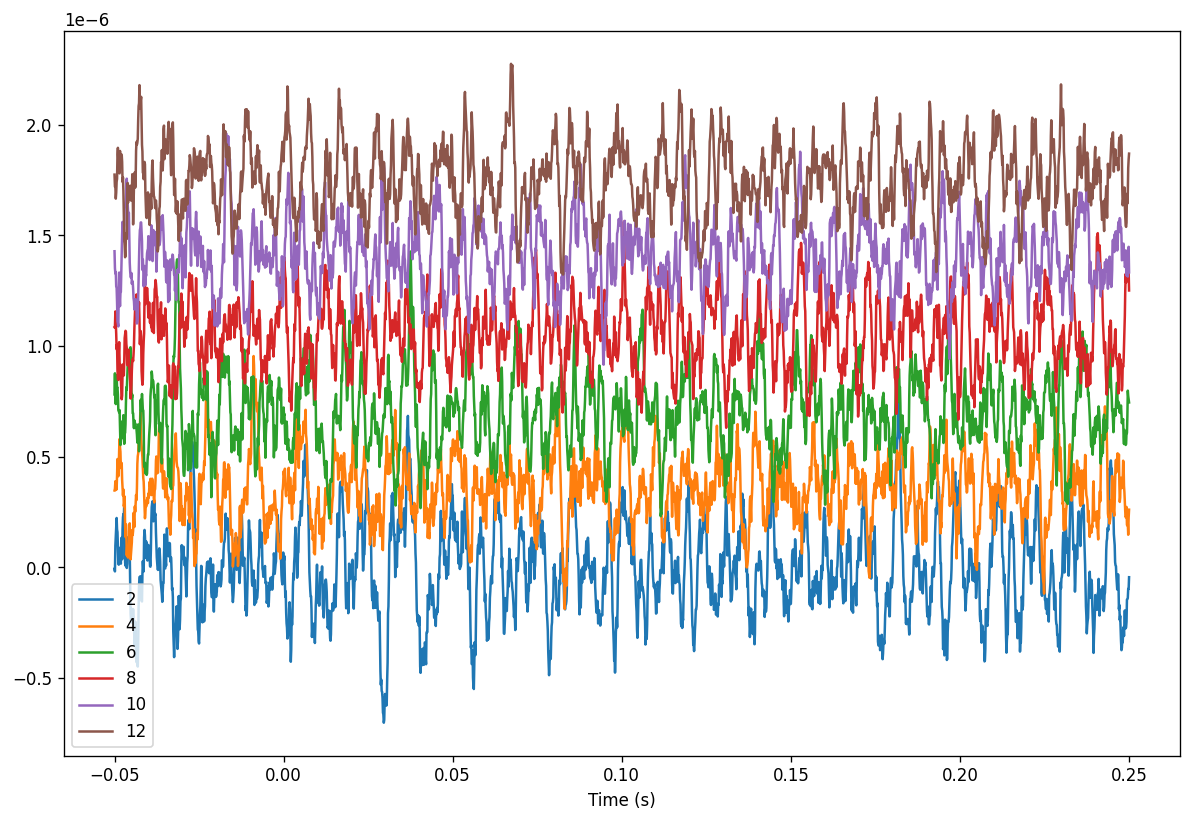

In [7]:
#Plotter
chans_plot = id_cz;
# chans_plot = [16];
t = pos_avgs.times;

for r in range(len(ranks)):
    pos_plt = all_pos_out[r].data[chans_plot,:];
    pos_plt = np.mean(pos_plt,0);
    neg_plt = all_neg_out[r].data[chans_plot,:];
    neg_plt = np.mean(neg_plt,0);
    
    plt.plot(t,(pos_plt+neg_plt)/2 + r*3.5e-7)
    
plt.legend(ranks)
plt.xlabel('Time (s)')

Need more than one channel to make topography for eeg. Disabling interactivity.


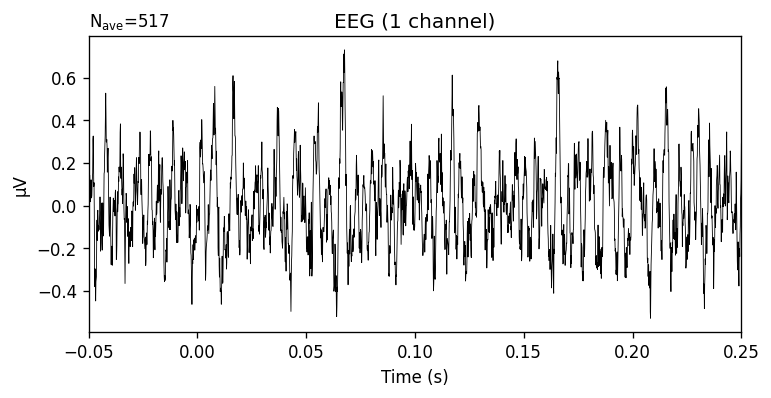

In [8]:
pos_avgs.plot(picks = chans_plot);

<Figure size 1440x960 with 0 Axes>

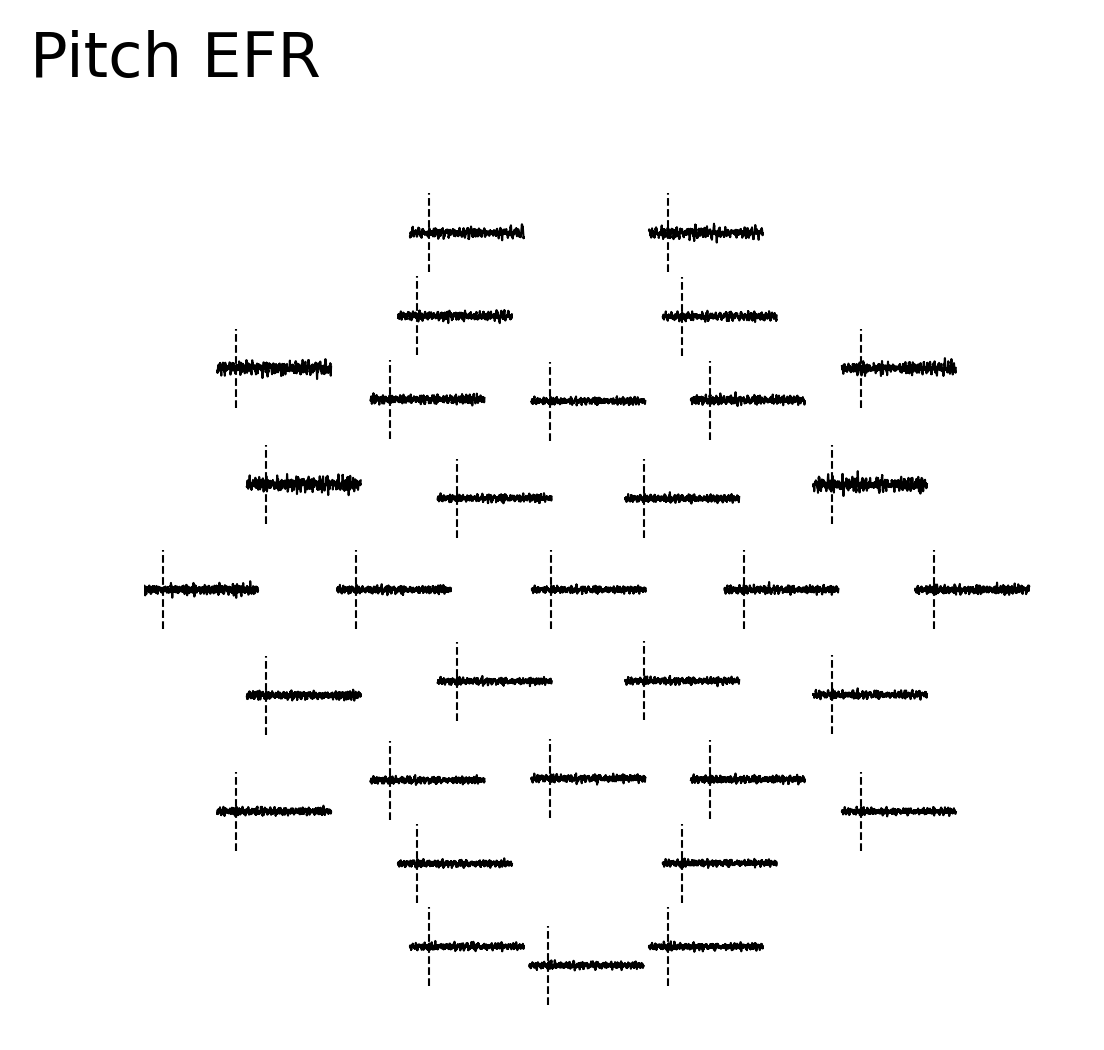

In [9]:
comb = mne.combine_evoked([pos_avgs,neg_avgs],weights = [.5,.5]);

topo_fig = plt.figure();
topo_fig.clear();
plt.rcParams.update({'figure.figsize': (4,4)})
plt.rcParams.update({'lines.linewidth': 1})
topo_fig = plt.figure(dpi = 300)
ax = plt.gca();
topo_fig = comb.plot_topo(ylim = dict(eeg=[-4,4]),legend=False, axes = ax,title = 'Pitch EFR', color = 'black');
#topo_fig2 = neg_avgs.plot_topo(ylim = dict(eeg=[-4,4.]),legend=False, axes = ax, title = 'ACCs', color = 'blue');
topo_fig.show()
plt.show()

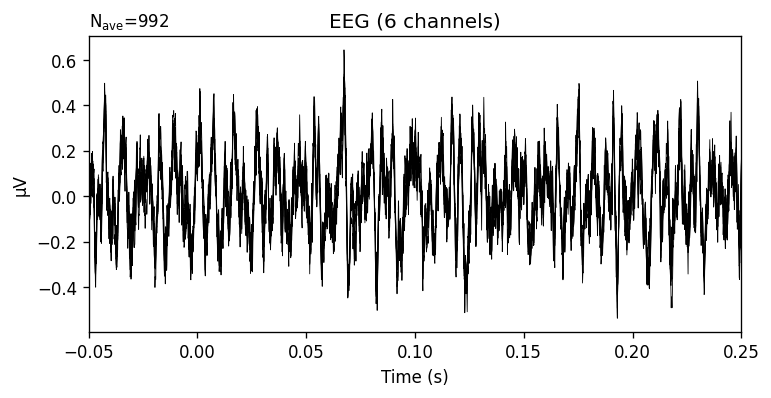

In [10]:
comb.plot(picks = efr_chans);

In [11]:
#ITC Analysis